# AudioCLIP Demo

Authored by [Andrey Guzhov](https://github.com/AndreyGuzhov)

This notebook covers common use cases of AudioCLIP and provides the typical workflow.
Below, you will find information on:

0. [Binary Assets](#Downloading-Binary-Assets)
1. [Required imports](#Imports-&-Constants)
2. [Model Instantiation](#Model-Instantiation)
3. [Data Transformation](#Audio-&-Image-Transforms)
4. Data Loading
    * [Audio](#Audio-Loading)
    * [Images](#Image-Loading)
5. [Preparation of the Input](#Input-Preparation)
6. [Acquisition of the Output](#Obtaining-Embeddings)
7. [Normalization of Embeddings](#Normalization-of-Embeddings)
8. [Calculation of Logit Scales](#Obtaining-Logit-Scales)
9. [Computation of Similarities](#Computing-Similarities)
10. Performing Tasks
    1. [Classification](#Classification)
        1. [Audio](#Audio)
        2. [Images](#Images)
    2. [Querying](#Querying)
        1. [Audio by Text](#Audio-by-Text)
        2. [Images by Text](#Images-by-Text)
        3. [Audio by Images](#Audio-by-Images)
        4. [Images by Audio](#Images-by-Audio)

## Downloading Binary Assets

In [1]:
#! wget -P ../assets/ https://github.com/AndreyGuzhov/AudioCLIP/releases/download/v0.1/bpe_simple_vocab_16e6.txt.gz
#! wget-P ../assets/ https://github.com/AndreyGuzhov/AudioCLIP/releases/download/v0.1/AudioCLIP-Full-Training.pt

## Imports & Constants

In [2]:
import os
import sys
import glob

import librosa
import numpy as np

import torch
import torchvision as tv

from PIL import Image
from IPython.display import Audio, display

sys.path.append(os.path.abspath(f'{os.getcwd()}/..'))

from model import AudioCLIP
from utils.transforms import ToTensor1D


torch.set_grad_enabled(False)

MODEL_FILENAME = 'AudioCLIP-Full-Training.pt'
# derived from ESResNeXt
SAMPLE_RATE = 44100
# derived from CLIP
IMAGE_SIZE = 224

Bpe path:  C:\Users\betel\Downloads\AudioCLIP\utils\..\assets\bpe_simple_vocab_16e6.txt.gz


## Model Instantiation

In [3]:
aclp = AudioCLIP(pretrained=f'../assets/{MODEL_FILENAME}')

## Audio & Image Transforms

In [4]:
audio_transforms = ToTensor1D()

image_transforms = tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Resize(IMAGE_SIZE, interpolation=Image.BICUBIC),
    tv.transforms.CenterCrop(IMAGE_SIZE),
    #tv.transforms.Normalize(IMAGE_MEAN, IMAGE_STD)
])

## Audio Loading
Audio samples are drawn from the [ESC-50](https://github.com/karolpiczak/ESC-50) dataset.

In [5]:
import cv2
from moviepy.editor import VideoFileClip
import random

def extract_frames(video_path, count):
    """Takes a single video and returns the frames"""
    video = cv2.VideoCapture(video_path) #video.get(cv2.CAP_PROP_FPS) => 25.0

    success = True
    frames_list = []
    i = 0

    while success:
        success, frames = video.read()
        if success and i < 125: #taking only 125 frames: 5 second clip * 25 fps
            frames_list.append(frames)
            i = i + 1

        else:
            break

    images = np.array(frames_list)
    middle_element = int(len(frames_list)/2)
    middle_frame = images[middle_element]
    
    filename = "our_images/output_images"
    extension = ".jpg"
    image_filename = f"{filename}_{count}{extension}"
    cv2.imwrite(image_filename, middle_frame)

    print("Video frames are sucessfully extracted!")
    return middle_frame

In [6]:
def extract_audio(video_path, count):
    """Takes the path to a single video and returns the extracted audio"""
    video = VideoFileClip(video_path)
    video_clip = video.subclip(0, 5) #take only the first 5 seconds
    audio_clip = video_clip.audio #video_clip.audio.fps => 44100 H
    filename = "our_audio/output_audio_file"
    extension = ".wav"
    audio_filename = f"{filename}_{count}{extension}"
    audio_clip.write_audiofile(audio_filename)
    
    print("Audio is sucessfully extracted!")
    return audio_clip

In [7]:
def get_file_list(dir_path):
    """Takes directory path and returns list of paths to each video"""
    file_list = []
    print("Dir path: ", dir_path)

    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            file_list.append(os.path.join(dir_path, path))
    print("Video files are read!")
    
    return file_list

In [8]:
# Extract frames and audio from video
video_path = "PATH\\TO\\VIDEO\\FOLDER"
file_list = get_file_list(video_path)

image_per_video = []
audio_per_video = []
count = 0
for file in file_list:
    frames = extract_frames(file, count)
    audio = extract_audio(file, count)
    image_per_video.append(frames)
    audio_per_video.append(audio)
    count = count + 1

Dir path:  C:\Masters\semester_3\Project_1\data\ERB3_Stimuli
Video files are read!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s
MoviePy - Done.
Audio is sucessfully extracted!


Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s
MoviePy - Done.
Audio is sucessfully extracted!


Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


chunk:  29%|██████████████████▏                                            | 32/111 [00:00<00:00, 317.42it/s, now=None]

MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


chunk:  28%|█████████████████▌                                             | 31/111 [00:00<00:00, 308.15it/s, now=None]

MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s
MoviePy - Done.
Audio is sucessfully extracted!


Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


chunk:  42%|██████████████████████████▋                                    | 47/111 [00:00<00:00, 467.97it/s, now=None]

MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


chunk:  32%|████████████████████▍                                          | 36/111 [00:00<00:00, 358.85it/s, now=None]

MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


chunk:  37%|███████████████████████▎                                       | 41/111 [00:00<00:00, 405.76it/s, now=None]

MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


chunk:  41%|█████████████████████████▌                                     | 45/111 [00:00<00:00, 448.42it/s, now=None]

MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


chunk:  23%|██████████████▏                                                | 25/111 [00:00<00:00, 249.96it/s, now=None]

MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


chunk:  32%|███████████████████▊                                           | 35/111 [00:00<00:00, 349.25it/s, now=None]

MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!
Video frames are sucessfully extracted!


MoviePy - Writing audio in %s
MoviePy - Done.
Audio is sucessfully extracted!


Video frames are sucessfully extracted!


MoviePy - Writing audio in %s


MoviePy - Done.
Audio is sucessfully extracted!


## Experiment

In [9]:
paths_to_audio = glob.glob('our_audio/*.wav')

all_audio = list()
for path_to_audio in paths_to_audio:
    track, _ = librosa.load(path_to_audio, sr=SAMPLE_RATE, dtype=np.float32)

    # compute spectrograms using trained audio-head (fbsp-layer of ESResNeXt)
    # thus, the actual time-frequency representation will be visualized
    spec = aclp.audio.spectrogram(torch.from_numpy(track.reshape(1, 1, -1)))
    spec = np.ascontiguousarray(spec.numpy()).view(np.complex64)
    pow_spec = 10 * np.log10(np.abs(spec) ** 2 + 1e-18).squeeze()

    all_audio.append((track, pow_spec))
        
print(len(all_audio))

41


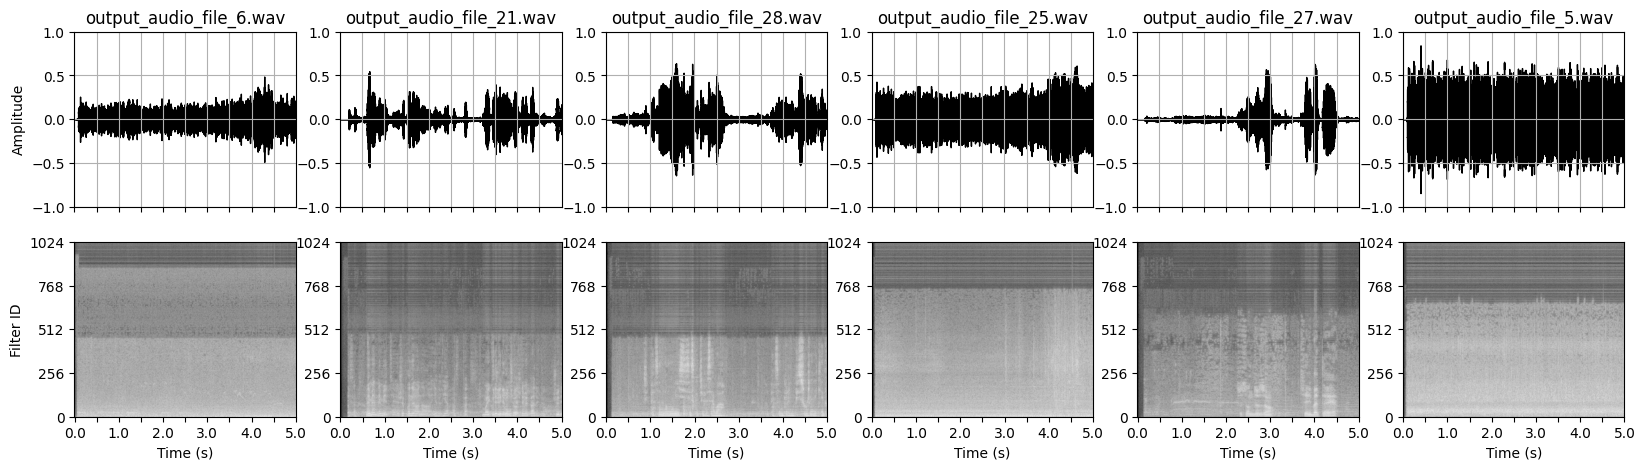

output_audio_file_6.wav


output_audio_file_21.wav


output_audio_file_28.wav


output_audio_file_25.wav


output_audio_file_27.wav


output_audio_file_5.wav


In [10]:
import matplotlib.pyplot as plt
import librosa.display
import random

num_of_samples = 6
random_numbers = [random.randint(0, len(all_audio)-1) for i in range(num_of_samples)]

#sample from the audio list using the randomly generated numbers
audio = []
for num in random_numbers:
    audio.append(all_audio[num])

path_audio = []
for num in random_numbers:
    path_audio.append(paths_to_audio[num])

paths_to_audio = path_audio


# Plot
fig, axes = plt.subplots(2, len(audio), figsize=(20, 5), dpi=100)

for idx in range(len(audio)):
    track, pow_spec = audio[idx]

    # draw the waveform
    librosa.display.waveplot(track, sr=SAMPLE_RATE, ax=axes[0, idx], color='k')
    # show the corresponding power spectrogram
    axes[1, idx].imshow(pow_spec, origin='lower', aspect='auto', cmap='gray', vmin=-180.0, vmax=20.0)

    # modify legend
    axes[0, idx].set_title(os.path.basename(paths_to_audio[idx]))
    axes[0, idx].set_xlabel('')
    axes[0, idx].set_xticklabels([])
    axes[0, idx].grid(True)
    axes[0, idx].set_ylim(bottom=-1, top=1)

    axes[1, idx].set_xlabel('Time (s)')
    axes[1, idx].set_xticks(np.linspace(0, pow_spec.shape[1], len(axes[0, idx].get_xticks())))
    axes[1, idx].set_xticklabels([f'{tick:.1f}' if tick == int(tick) else '' for tick in axes[0, idx].get_xticks()])
    axes[1, idx].set_yticks(np.linspace(0, pow_spec.shape[0] - 1, 5))

axes[0, 0].set_ylabel('Amplitude')
axes[1, 0].set_ylabel('Filter ID')

plt.show()
plt.close(fig)

for idx, path in enumerate(paths_to_audio):
    if idx < len(audio):
        print(os.path.basename(path))
        display(Audio(audio[idx][0], rate=SAMPLE_RATE, embed=True))

## Image Loading

In [11]:
import simplejpeg

paths_to_images = glob.glob('our_images/*.jpg')

all_images = list()
for path_to_image in paths_to_images:
    with open(path_to_image, 'rb') as jpg:
        image = simplejpeg.decode_jpeg(jpg.read())
        all_images.append(image)

print(len(all_images))

41


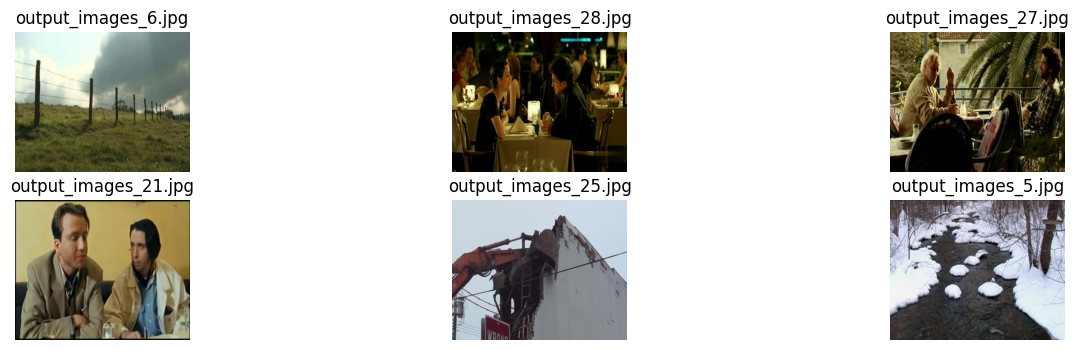

In [12]:
#sample from the images list using the previously randomly generated numbers
images = []
for num in random_numbers:
    images.append(all_images[num])

path_images = []
for num in random_numbers:
    path_images.append(paths_to_images[num])

paths_to_images = path_images

# Plot
fig, axes = plt.subplots(2, len(images) // 2, figsize=(16, 4), dpi=100)

for idx, jdx in np.ndindex(axes.shape):
    # re-arrange order to show the images column-wise
    image_idx = np.ravel_multi_index(((jdx,), (idx,)), axes.shape[::-1]).item()
    axes[idx, jdx].imshow(images[image_idx])

    # modify legend
    axes[idx, jdx].axis('off')
    axes[idx, jdx].set_title(os.path.basename(paths_to_images[image_idx]))

plt.show()
plt.close(fig)

## Input Preparation

In [13]:
# AudioCLIP handles raw audio on input, so the input shape is [batch x channels x duration]
audio = torch.stack([audio_transforms(track.reshape(1, -1)) for track, _ in audio])
# standard channel-first shape [batch x channels x height x width]
images = torch.stack([image_transforms(image) for image in images])
# textual input is processed internally, so no need to transform it beforehand
#text = [[label] for label in LABELS]
print(audio.shape)
print(images.shape)

torch.Size([6, 1, 220500])
torch.Size([6, 3, 224, 224])


## Obtaining Embeddings
For the sake of clarity, all three modalities are processed separately.

In [14]:
# AudioCLIP's output: Tuple[Tuple[Features, Logits], Loss]
# Features = Tuple[AudioFeatures, ImageFeatures, TextFeatures]
# Logits = Tuple[AudioImageLogits, AudioTextLogits, ImageTextLogits]

((audio_features, _, _), _), _ = aclp(audio=audio)
((_, image_features, _), _), _ = aclp(image=images)

## Normalization of Embeddings
The AudioCLIP's output is normalized using L<sub>2</sub>-norm

In [15]:
audio_features = audio_features / torch.linalg.norm(audio_features, dim=-1, keepdim=True)
image_features = image_features / torch.linalg.norm(image_features, dim=-1, keepdim=True)

## Obtaining Logit Scales
Outputs of the text-, image- and audio-heads are made consistent using dedicated scaling terms for each pair of modalities.
The scaling factors are clamped between 1.0 and 100.0.

In [16]:
import torch.nn as nn
from sklearn.metrics.pairwise import cosine_similarity

def logits(feature1, feature2):
    # normalized features
    image_features = feature1 / feature1.norm(dim=1, keepdim=True)
    audio_features = feature2 / feature2.norm(dim=1, keepdim=True)

    # cosine similarity as logits
    logit_scale = nn.Parameter(torch.ones([]) * np.log(1 / 0.07))
    logit_scale = logit_scale.exp()
    logits_per_image = logit_scale * image_features @ audio_features.t()
    logits_per_audio = logits_per_image.t()
    probs = logits_per_image.softmax(dim=-1).detach().cpu().numpy()

    return probs

In [17]:
def similarity(feature1, feature2):
    feature1 /= feature1.norm(dim=-1, keepdim=True)
    feature2 /= feature2.norm(dim=-1, keepdim=True)
    similarity = (100.0 * feature1 @ feature2.T).softmax(dim=-1)
    
    return similarity

In [18]:
def pair_cosine_similarity(feature1, feature2):
    similarity = cosine_similarity(feature1, feature2)
    
    return similarity

In [19]:
probs_image_audio = logits(image_features, audio_features)
similarity_ = similarity(image_features, audio_features)
cos_similarity = pair_cosine_similarity(image_features, audio_features)

print("Probs: ", probs_image_audio)
print("Similarity: ", similarity_)
print("Cosine similarity: ", cos_similarity)

Probs:  [[0.36438343 0.14958462 0.08821656 0.0921437  0.11835677 0.18731482]
 [0.07403341 0.29607734 0.20306544 0.12008049 0.15113474 0.15560855]
 [0.04532708 0.22531746 0.2341225  0.2585606  0.11016603 0.12650628]
 [0.1756972  0.13868475 0.07602831 0.22784042 0.1940252  0.18772405]
 [0.09822234 0.2198438  0.08192176 0.19239217 0.26552254 0.14209734]
 [0.20109682 0.15770401 0.1567012  0.10317294 0.16363676 0.2176882 ]]
Similarity:  tensor([[9.8819e-01, 1.9415e-03, 4.8171e-05, 6.5342e-05, 3.7695e-04, 9.3743e-03],
        [5.5898e-05, 9.1461e-01, 6.5291e-02, 1.6508e-03, 8.2594e-03, 1.0131e-02],
        [2.6923e-06, 2.0192e-01, 2.6407e-01, 5.2911e-01, 1.3488e-03, 3.5514e-03],
        [9.1299e-02, 1.7431e-02, 2.5938e-04, 5.6302e-01, 1.8286e-01, 1.4513e-01],
        [6.8421e-04, 1.9254e-01, 1.9209e-04, 7.5689e-02, 7.2182e-01, 9.0745e-03],
        [2.9902e-01, 5.4545e-02, 5.2164e-02, 2.7978e-03, 7.0636e-02, 5.2084e-01]])
Cosine similarity:  [[0.24506578 0.18274173 0.14577697 0.14882578 0.166

In [20]:
#Logit scales
scale_audio_image = torch.clamp(aclp.logit_scale_ai.exp(), min=1.0, max=100.0)
scale_audio_text = torch.clamp(aclp.logit_scale_at.exp(), min=1.0, max=100.0)
scale_image_text = torch.clamp(aclp.logit_scale.exp(), min=1.0, max=100.0)

## Computing Similarities
Similarities between different representations of a same concept are computed using [scaled](#Obtaining-Logit-Scales) dot product (cosine similarity).

In [21]:
logits_audio_image = scale_audio_image * audio_features @ image_features.T

In [22]:
print("Logits Audio-Image: ", logits_audio_image)
print("Confidence: ", logits_audio_image.softmax(dim=0))
print("Scale: ", scale_audio_image)

Logits Audio-Image:  tensor([[16.6968,  8.7918,  7.3430, 14.3060, 13.4617, 12.8418],
        [12.4506, 15.4025, 14.9910, 13.1778, 17.3042, 11.6826],
        [ 9.9321, 13.6040, 15.1738, 10.3110, 12.5962, 11.6521],
        [10.1398, 11.0984, 15.6473, 15.5454, 16.6681,  9.6589],
        [11.3338, 12.1954, 11.5785, 14.7792, 18.2046, 11.8587],
        [13.5233, 12.3345, 12.2381, 14.6218, 15.2229, 13.2199]])
Confidence:  tensor([[9.4035e-01, 1.0620e-03, 1.1289e-04, 1.2866e-01, 5.1724e-03, 2.8627e-01],
        [1.3464e-02, 7.8901e-01, 2.3666e-01, 4.1637e-02, 2.4125e-01, 8.9811e-02],
        [1.0849e-03, 1.3063e-01, 2.8413e-01, 2.3684e-03, 2.1768e-03, 8.7120e-02],
        [1.3354e-03, 1.0663e-02, 4.5621e-01, 4.4436e-01, 1.2770e-01, 1.1871e-02],
        [4.4071e-03, 3.1935e-02, 7.8000e-03, 2.0653e-01, 5.9359e-01, 1.0711e-01],
        [3.9359e-02, 3.6702e-02, 1.5085e-02, 1.7644e-01, 3.0100e-02, 4.1782e-01]])
Scale:  tensor(68.1320)


## Classification
This task is a specific case of a more general one, which is [querying](#Querying).
However, this setup is mentioned as a standalone because it demonstrates clearly how to perform usual classification (including [zero-shot inference](https://github.com/openai/CLIP#zero-shot-prediction)) using AudioCLIP.

## Querying

### Audio by Images

In [23]:
print('\tTextual Label\t\t\tFilename, Image (Confidence)', end='\n\n')

# calculate model confidence
confidence = logits_audio_image.softmax(dim=0)
for image_idx in range(len(paths_to_images)):
    # acquire Top-2 most similar results
    if image_idx < len(image_features):
        conf_values, ids = confidence[:, image_idx].topk(2)

        # format output strings
        query = f'{os.path.basename(paths_to_images[image_idx]):>25s} ->\t\t'
        results = ', '.join([f'{os.path.basename(paths_to_audio[i]):>30s} ({v:06.2%})' for v, i in zip(conf_values, ids)])

        print(query + results)

	Textual Label			Filename, Image (Confidence)

      output_images_6.jpg ->		       output_audio_file_6.wav (94.03%),        output_audio_file_5.wav (03.94%)
     output_images_21.jpg ->		      output_audio_file_21.wav (78.90%),       output_audio_file_28.wav (13.06%)
     output_images_28.jpg ->		      output_audio_file_25.wav (45.62%),       output_audio_file_28.wav (28.41%)
     output_images_25.jpg ->		      output_audio_file_25.wav (44.44%),       output_audio_file_27.wav (20.65%)
     output_images_27.jpg ->		      output_audio_file_27.wav (59.36%),       output_audio_file_21.wav (24.13%)
      output_images_5.jpg ->		       output_audio_file_5.wav (41.78%),        output_audio_file_6.wav (28.63%)


### Images by Audio

In [24]:
print('\tTextual Label\t\t\tFilename, Image (Confidence)', end='\n\n')

# calculate model confidence
confidence = logits_audio_image.softmax(dim=1)

for audio_idx in range(len(paths_to_audio)):
    # acquire Top-2 most similar results
    if audio_idx < len(audio_features):
        conf_values, ids = confidence[audio_idx].topk(2)

        # format output strings
        query = f'{os.path.basename(paths_to_audio[audio_idx]):>30s} ->\t\t'
        results = ', '.join([f'{os.path.basename(paths_to_images[i]):>15s} ({v:06.2%})' for v, i in zip(conf_values, ids)])

        print(query + results)

	Textual Label			Filename, Image (Confidence)

       output_audio_file_6.wav ->		output_images_6.jpg (86.77%), output_images_25.jpg (07.94%)
      output_audio_file_21.wav ->		output_images_27.jpg (78.38%), output_images_21.jpg (11.70%)
      output_audio_file_28.wav ->		output_images_28.jpg (75.38%), output_images_21.jpg (15.69%)
      output_audio_file_25.wav ->		output_images_27.jpg (59.10%), output_images_28.jpg (21.30%)
      output_audio_file_27.wav ->		output_images_27.jpg (96.24%), output_images_25.jpg (03.13%)
       output_audio_file_5.wav ->		output_images_27.jpg (50.71%), output_images_25.jpg (27.80%)
